<a href="https://colab.research.google.com/github/ktxdev/NLP-Prac/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installing spaCy and downloading English language model

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing packages

In [18]:
import csv
import spacy
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.manifold import TSNE
from IPython.display import clear_output

%matplotlib inline

## Load the english model

In [19]:
nlp = spacy.load('en_core_web_lg')

## Word similarity

In [4]:
cat = nlp.vocab['cat']
dog = nlp.vocab['dog']
car = nlp.vocab['car']

print('Vector length:', len(cat.vector))
print('Cat:', cat.vector)

Vector length: 300
Cat: [ 3.7032e+00  4.1982e+00 -5.0002e+00 -1.1322e+01  3.1702e-02 -1.0255e+00
 -3.0870e+00 -3.7327e+00  5.3875e-01  3.5679e+00  6.9276e+00  1.5793e+00
  5.1188e-01  3.1868e+00  6.1534e+00 -4.8941e+00 -2.9959e-01 -3.6276e+00
  2.3825e+00 -1.4402e+00 -4.7577e+00  4.3607e+00 -4.9814e+00 -3.6672e+00
 -1.8052e+00 -2.1888e+00 -4.2875e+00  5.5712e+00 -5.2875e+00 -1.8346e+00
 -2.2015e+00 -7.7091e-01 -4.8260e+00  1.2464e+00 -1.7945e+00 -8.1280e+00
  1.9994e+00  1.1413e+00  3.8032e+00 -2.8783e+00 -4.2136e-01 -4.4177e+00
  7.7456e+00  4.9535e+00  1.7402e+00  1.8275e-01  2.4218e+00 -3.1496e+00
 -3.8057e-02 -2.9818e+00  8.3396e-01  1.1531e+01  3.5684e+00  2.5970e+00
 -2.8438e+00  3.2755e+00  4.5674e+00  3.2219e+00  3.4206e+00  1.1200e-01
  1.0303e-01 -5.8396e+00  4.6370e-01  2.7750e+00 -5.3713e+00 -5.0247e+00
 -2.0212e+00  5.8772e-01  1.1569e+00  1.3224e+00  4.3994e+00  2.0444e+00
  2.1343e+00 -1.9023e+00  2.1469e+00 -2.9085e+00  4.8429e-01 -3.3544e-01
  1.4484e+00 -1.5770e+00 -1

In [5]:
computer = nlp.vocab['computer']

print(len(computer.vector))

300


In [6]:
print('The similarity between cat and cat:', cat.similarity(cat))
print('The similarity between cat and dog:', cat.similarity(dog))
print('The similarity between dog and cat:', dog.similarity(cat))
print('The similarity between cat and car:', cat.similarity(car))
print('The similarity between dog and car:', dog.similarity(car))

The similarity between cat and cat: 1.0
The similarity between cat and dog: 0.8220816850662231
The similarity between dog and cat: 0.8220816850662231
The similarity between cat and car: 0.19698593020439148
The similarity between dog and car: 0.3250025510787964


In [7]:
hotel = nlp.vocab['hotel']
motel = nlp.vocab['motel']
hospital = nlp.vocab['hospital']

print(hotel.similarity(motel))

print(hotel.similarity(hospital))

0.7972080111503601
0.4250935912132263


In [8]:
cosine_dog_car = np.dot(dog.vector, car.vector)/(dog.vector_norm*car.vector_norm)
print('The similarity between dog and car calculated manually:', cosine_dog_car)

The similarity between dog and car calculated manually: 0.32500255


In [13]:
def most_similar(word, top_n = 10):
  all_words = [w for w in nlp.vocab if w.has_vector and w.is_lower and w.lower_ != word.lower_]
  by_similarity = sorted(all_words, key = lambda w: word.similarity(w), reverse = True)
  return by_similarity[:top_n]

cat_similar = [w.text for w in most_similar(dog)]
print('Similar words to cat:', cat_similar)

Similar words to cat: ['cat', 'you', 'car', 'somethin’', 'lovin’', "'cause", 'lovin', 'she', "somethin'", 'it']


## Word Analogy

In [15]:
king = nlp.vocab['king']
man = nlp.vocab['man']
woman = nlp.vocab['woman']

# resulting vector
result = king.vector - man.vector + woman.vector

# function to compute cosine similarity
cosine = lambda v1, v2: np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

queen = nlp.vocab['queen']
print('Similarity between queen and result:', cosine(result, queen.vector))

Similarity between queen and result: 0.6178014


In [16]:
allwords = [w for w in nlp.vocab if w.has_vector and w.is_lower and w.lower_ != 'king' and w.lower_ != 'man' and w.lower_ != 'woman']

candidates = sorted(allwords, key=lambda w: cosine(result, w.vector), reverse=True)
print([c.text for c in candidates[:5]])

['queen', 'and', 'that', 'r.', 'where']


In [20]:
Paris = nlp.vocab['Paris']
France = nlp.vocab['France']
Madrid = nlp.vocab['Madrid']

maybe_Spain = France.vector - Paris.vector + Madrid.vector

allwords = [w for w in nlp.vocab if w.has_vector and w.lower_ != 'paris' and w.lower_ != 'madrid' and w.lower_ != 'france']
candidates = sorted(allwords, key=lambda w: cosine(maybe_Spain, w.vector), reverse=True)
print([c.text for c in candidates[:5]])

['and', 'Colo', 'Calif', 'were', 'where']


## Sentence/Document Level Similarity

In [21]:
s1 = (nlp.vocab['Cats'].vector + nlp.vocab['are'].vector + nlp.vocab['beautiful'].vector + \
    nlp.vocab['animals'].vector + nlp.vocab['.'].vector) / 5
s2 = (nlp.vocab['Some'].vector + nlp.vocab['gorgeous'].vector + nlp.vocab['creatures'].vector + \
    nlp.vocab['are'].vector + nlp.vocab['felines'].vector + nlp.vocab['.'].vector) / 6
s3 = (nlp.vocab['Dolphins'].vector + nlp.vocab['are'].vector + nlp.vocab['swimming'].vector + \
    nlp.vocab['mammals'].vector + nlp.vocab['.'].vector) / 5

print(cosine(s1, s2))

print(cosine(s1, s3))

0.90675163
0.9037428


In [22]:
target = nlp("Cats are beautiful animals.")  # text about cats

doc1 = nlp("Some gorgeous creatures are felines.")  # text about cats
doc2 = nlp("Dolphins are swimming mammals.")  # text about dolphins

print('Similarity between target and doc1:', target.similarity(doc1))
print('Similarity between target and doc1:', target.similarity(doc2))

Similarity between target and doc1: 0.9067517259890845
Similarity between target and doc1: 0.9037427153904276


## Word Embeddings Visualization

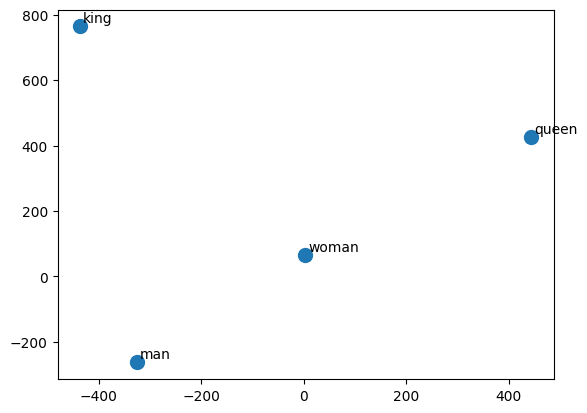

In [24]:
# use t-SNE to do dimension reduction, from 300d to 2d
tsne_model = TSNE(n_components=2, perplexity=2)

# get transformed vectors
data = np.array([king.vector, man.vector, queen.vector, woman.vector])
data_2d = tsne_model.fit_transform(data)

labels = ['king', 'man', 'queen', 'woman']

# plot the 2d vectors and show their labels
plt.scatter(data_2d[:, 0], data_2d[:, 1], s=100)
for i, txt in enumerate(labels):
    plt.annotate(txt, (data_2d[i,0], data_2d[i,1]), xytext=(2, 3), textcoords='offset points')
plt.show()

## Sentiment Analysis

In [25]:
# load files into the environment
from google.colab import files
uploaded = files.upload()

Saving combined_training.txt to combined_training.txt


In [26]:
# read data
data_raw = []
with open('combined_training.txt', newline='') as fr:
    reader = csv.reader(fr, delimiter='\t')
    for row in reader:
        data_raw.append([row[0], int(row[1])])

# print the number of data
print(len(data_raw))

# print the last data item
print(data_raw[-1])

2748
["Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.", 0]


In [27]:
x_train = np.array([nlp(d[0]).vector for d in data_raw])
y_train = np.array([d[1] for d in data_raw])

# print the dimension of x
print(x_train.shape)

# print the dimension of y
print(y_train.shape)

# double check
print(nlp(data_raw[-1][0]).text, y_train[-1])

(2748, 300)
(2748,)
Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check. 0


In [28]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# predict using trained model
predict = logreg.predict(np.array([nlp('the weather today is pleasant').vector, nlp('the food in this restaurant is beyond my expectation').vector]))
print(predict)

[1 0]
